In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Supervised Learning -- Regression Analysis

* in regression we are trying to predict a continuous output variable

* (in classification exmaples, we are predicting nominal variables)

simple "toy" example with:
* one feature dimension (explanatory variable) 
* one target variable

In [2]:
x = np.linspace(-3, 3, 100)
# print(x)

In [3]:
rng = np.random.RandomState(42)

# sine curve with some noise
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

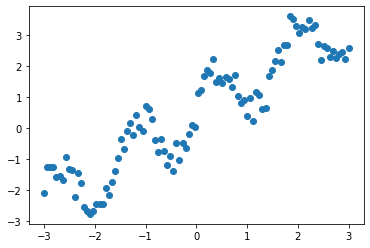

In [4]:
plt.plot(x, y, 'o');

# Linear Regression


"simple linear regression" 

* fit a line to the data
* predict the data as lying on a line

"Ordinary Least Squares" Linear Regression model:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

NB: https://en.wikipedia.org/wiki/Ordinary_least_squares

the scikit-learn API requires us to provide:

* target variable (`y`) as a 1-dimensional array
* samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature!

* as `X` must be a 2d array: we convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes

In [5]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


* start by splitting our dataset into a training (75%) and a test set (25%)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

* use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* linear regression model has parameters:

In [8]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.90211711]
y-axis intercept:  0.44840974988268


regression model = LINEAR => relationship between the target variable (y) and the feature variable (x):

$$y = \text{weight} \times x + \text{intercept}$$

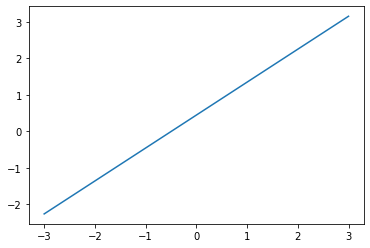

In [9]:
# use equation (with parameters) to find min and max 
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

# plot regression line
plt.plot([X.min(), X.max()], [min_pt, max_pt]);

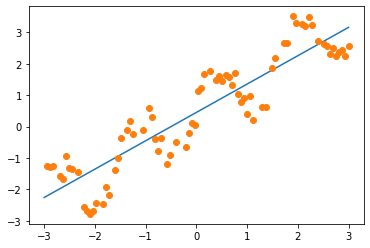

In [10]:
# plot regression fit to our training data
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

* use the `predict` method to predict the target variable

In [11]:
y_pred_train = regressor.predict(X_train)

* we expect these predicted values to fall onto the line that we plotted previously

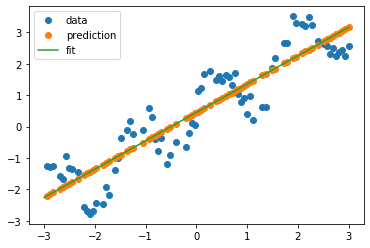

In [12]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

* line captures the general slope of the data, but not many details.

* try the test set:

In [13]:
y_pred_test = regressor.predict(X_test)

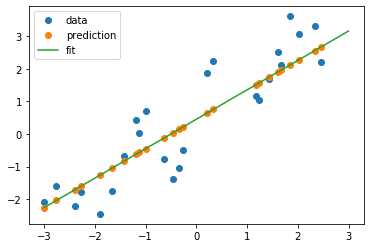

In [14]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

### `score` method

scikit-learn provides an easy way to **evaluate** the prediction quantitatively: [the R<sup>2</sup> score coefficient of determination](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [15]:
regressor.score(X_test, y_test)

0.7994321405079685

ASIDE: alternatively, Mean Squared Error (MSE) = average squared difference over the predicted and actual target values:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

Further Reading: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.7056695020009782

# EXERCISE

Add a (non-linear) feature containing  `sin(4x)` to `X` and redo the fit as a new column to X_train (and X_test). 

Hint: you can use `np.concatenate(A, B, axis=1)` to concatenate two matrices A and B horizontal (to combine the columns)

Visualize the predictions with this new richer, yet linear, model.

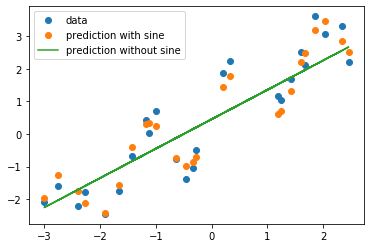

# KNeighborsRegression

we can also use a neighbor based method for regression

* take the output of the nearest point, or we could average several nearest points

(This method is less popular for regression than for classification, but still a good baseline)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

* behaviour on training and test set:

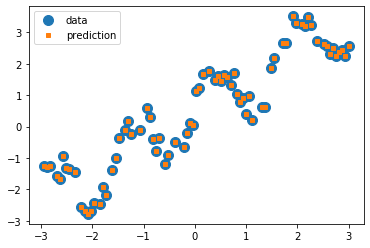

In [20]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

# On the training set, we do a perfect job: each point is its own nearest neighbor!

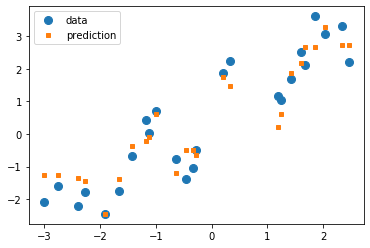

In [21]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

# On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.

the R<sup>2</sup> score

In [22]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

Much better than before! 

* linear model was not a good fit for our problem

    * it was lacking in complexity => under-fit our data

# EXERCISE

Compare the **KNeighborsRegressor** and **LinearRegression** on the boston housing dataset. 

* You can load the dataset using ``sklearn.datasets.load_boston``. 
    * from sklearn.datasets import load_boston
* You can learn about the dataset by reading the ``DESCR`` attribute.

X.shape: (506, 13)
Linear Regression Train/Test: 0.748/0.684
KNeighborsRegressor Train/Test: 1.000/0.481
